Implementing simple Chatbot using LangGraph

In [12]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from typing import Annotated
from IPython.display import Image, display

### Reducer
from langgraph.graph.message import add_messages


In [2]:
#### Defining the State Schema of the chatbot

class State(TypedDict):
    messages : Annotated[list,add_messages]


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

groq_api_key = os.getenv('GROQ_API_KEY')

In [8]:
import sys
print(sys.prefix)

c:\Users\Admin\Documents\Movate_AgenticAI\venv


In [4]:
groq_api_key

'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'

In [5]:
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey how are you doing today? ")

AIMessage(content='\n<think>\nOkay, the user asked, "Hey how are you doing today?" I need to respond appropriately. Let me start by acknowledging their greeting. Since I\'m an AI, I don\'t have feelings, but I should make that clear in a friendly way.\n\nI should keep the tone positive and offer assistance. Maybe say something like, "I\'m just a large language model, so I don\'t have feelings, but thanks for asking!" Then ask how they are doing and offer help with anything they need. Let me check if that flows naturally. Yeah, that should work. Let me put it all together.\n</think>\n\nI\'m just a large language model, so I don\'t have feelings, but thanks for asking! 😊 How about you? Is there anything I can help you with today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 161, 'prompt_tokens': 18, 'total_tokens': 179, 'completion_time': 0.40419832, 'prompt_time': 0.003180997, 'queue_time': 0.244033252, 'total_time': 0.407379317}, 'model_name': 'qwen-q

We will start creating Nodes

In [6]:
def superbot(state:State):
    return {'messages' : [llm_groq.invoke(state['messages'])]}

Construction of Graph

In [7]:
graph = StateGraph(State)

Adding the node

In [8]:
graph.add_node("superbot" , superbot)

Adding the edges

In [10]:
graph.add_edge(START , "superbot")
graph.add_edge("superbot" , END)

Compile the Graph

In [11]:
graph_builder = graph.compile()

View the Graph

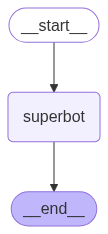

In [13]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

Invocation of graph as a Chatbot

In [14]:
graph_builder.invoke({'messages' : "Hi my name is Ankur. I like to train on Gen AI"})

{'messages': [HumanMessage(content='Hi my name is Ankur. I like to train on Gen AI', additional_kwargs={}, response_metadata={}, id='37f9a781-0570-4e3f-ae97-6204bc2248d6'),
  AIMessage(content="\n<think>\nOkay, Ankur has introduced himself and mentioned he wants to train on Gen AI. Let me start by welcoming him and acknowledging his interest. I should ask him more about his goals to understand how I can assist better. Maybe he's looking to learn the fundamentals, work on specific projects, or get resources? I should keep the tone friendly and encouraging. Let me make sure to phrase my questions in a way that invites him to share more details so I can provide tailored advice. I should also mention some general ways to get started with Gen AI, like learning about models, frameworks, or available datasets. But first, I need to prompt him to elaborate on his objectives. Let me structure my response to be open-ended and supportive.\n</think>\n\nHi Ankur! It's great to meet you. Training in 

Streaming the response

In [15]:
for event in graph_builder.stream({'messages' : "Hi my name is Ankur. I like to train on Gen AI"}):
    print(event)

{'superbot': {'messages': [AIMessage(content='\n<think>\nOkay, the user is Ankur, and he wants to train on Gen AI. Let me first figure out what exactly he means by "train on Gen AI." Maybe he\'s looking to get trained in using Generative AI, or perhaps he wants to train his own models? Since he mentioned "train on Gen AI," I should consider both possibilities.\n\nAnkur might be a developer or someone interested in AI, so I should start by asking for more details. But since he just provided a greeting and a statement, I need to respond in a friendly way to encourage him to elaborate. Maybe he\'s a beginner, so I should offer some basic resources or steps to get started with Gen AI.\n\nAlso, considering the response examples provided, I should structure my answer to be helpful and open-ended. I should mention learning resources, tools, and maybe even projects he can try. Let me list some key points:\n\n1. Clarify what he wants: training himself or training models?\n2. Suggest online cour